<a href="https://colab.research.google.com/github/dev-aprilchoi/projectManager/blob/main/d02%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84(0912).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd  # pandas 모듈을 불러온다
df = pd.read_excel('car.xlsx')  # car.xlsx 엑셀 파일을 열어서 그 내용을 df 변수에 넣는다
df.head()  # df 변수의 첫 5행을 확인한다

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [4]:
df.price.describe()

count     274.000000
mean      853.660584
std       332.613127
min       190.000000
25%       620.000000
50%       805.000000
75%      1090.000000
max      1820.000000
Name: price, dtype: float64

In [5]:
df.describe()

,mileage,price,year,my_car_damage,other_car_damage
count,274.000000,274.000000,274.000000,2.740000e+02,2.740000e+02
mean,77483.222628,853.660584,2013.273723,2.319453e+06,1.807992e+06
std,43015.794453,332.613127,2.589406,3.080107e+06,4.655390e+06
min,2287.000000,190.000000,2006.000000,0.000000e+00,0.000000e+00
25%,47597.500000,620.000000,2011.000000,0.000000e+00,0.000000e+00
50%,71649.000000,805.000000,2014.000000,1.100410e+06,3.986190e+05
75%,103193.750000,1090.000000,2015.000000,3.002840e+06,1.640666e+06
max,310000.000000,1820.000000,2018.000000,1.536732e+07,5.510890e+07


In [6]:
df.price.mean()

853.6605839416059

In [7]:
df.price.median()

805.0

In [8]:
df.model.value_counts()

Avante    205
K3         69
Name: model, dtype: int64

In [9]:
df.price.min()

190

In [10]:
df.price.max()

1820

In [11]:
df.price.quantile(.25) # 25퍼센타일 = 25퍼센트 위치

620.0

In [12]:
df.price.max() - df.price.min() # 범위 = 최댓값 - 최솟값

1630

In [13]:
df.sort_values('price') # price 순으로 정렬

,mileage,model,price,year,my_car_damage,other_car_damage
253,152000,Avante,190,2007,6748356,330800
259,47743,Avante,220,2006,6249300,55108900
260,105856,Avante,230,2009,9769990,417820
267,310000,Avante,250,2008,1047529,0
266,184000,Avante,250,2006,1481678,925600
...,...,...,...,...,...,...
7,2287,K3,1599,2018,0,0
106,37152,Avante,1720,2016,0,0
84,9600,Avante,1799,2018,315398,0
120,9000,Avante,1820,2017,878760,793850


In [14]:
df.price.quantile(.75) - df.price.quantile(.25)  # 사분위간범위(IQR) = 3사분위수 - 1사분위수

470.0

In [15]:
df.price.quantile(.90) - df.price.quantile(.10)  # 십분위간범위

884.0

<Axes: xlabel='price'>

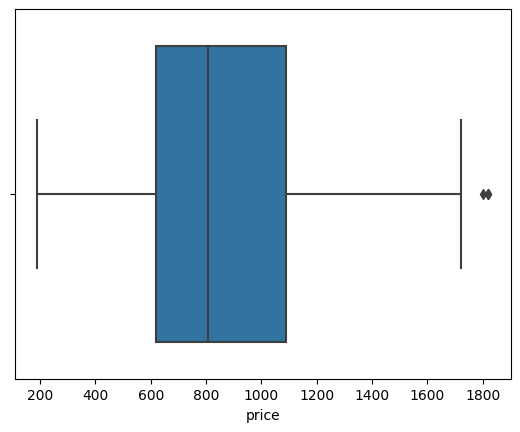

In [18]:
import seaborn as sns
sns.boxplot(x='price', data=df)

<Axes: xlabel='price', ylabel='model'>

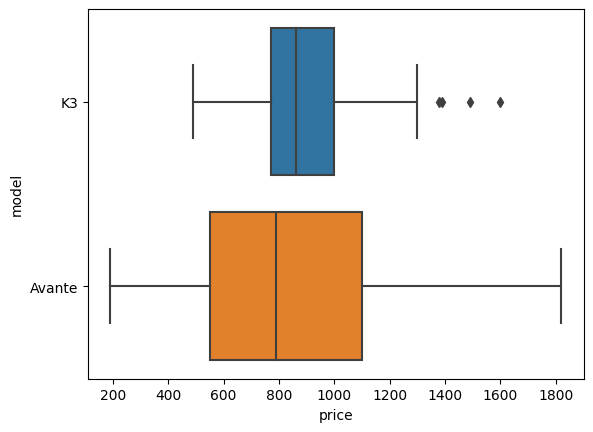

In [20]:
sns.boxplot(x='price', y='model', data=df)

In [21]:
df.price.var()

110631.4924333574

In [22]:
df.price.std()

332.61312727154564

<Axes: xlabel='price', ylabel='Count'>

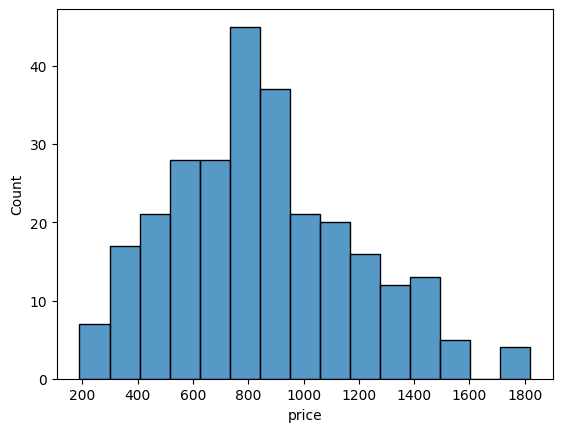

In [26]:
sns.histplot(x='price', data=df, bins=15) # bins: 막대기 몇개로 나타낼지

<Axes: xlabel='price', ylabel='Count'>

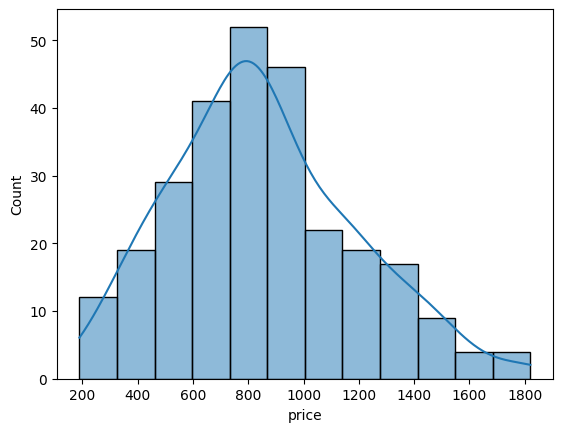

In [27]:
sns.histplot(x='price', data=df, kde=True)

In [28]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=3fdc92ab620c76d95fb802186215e7d817481dcbdbf21984a3f5fd8172432ab3
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [29]:
import pingouin as pg
pg.ttest(df.price, 0, confidence=0.95) # 중고차 평균 가격의 95% 신뢰구간

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


중고차 시장(약 360만대) 전수 조사를 하면 평균 가격이
814~893만원 사이에서 나올 것 같다고 추정(우리가 이런 비슷한 추정을 100번하면 95번 정도는 저 범위에 들어감)

In [30]:
df.price.mean() # 853±40

853.6605839416059

801 ~ 905 = 853±52

중고차 사업을 할 건데
못해도 평균 가격 850만원은 되야 수지가 맞는다
850 - 900 /
800 - 850
결국은 신뢰구간을 좁혀야하는데(오차범위)
신뢰수준을 낮추면 오차범위가 내려가는데 그걸 건드리기는 어렵다.



In [32]:
pg.ttest(df.price, 0, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


오차범위 814.1 ~ 893.22 = 853 ±39.56

In [33]:
853.6605839416059 - 814.1

39.56058394160584

In [34]:
853.6605839416059 - 893.22

-39.55941605839416

오차범위 구하는 법

In [35]:
(893.22 - 814.1) / 2

39.56

In [31]:
pg.ttest(df.price.sample(65), 0, confidence=0.95) # 차량 갯수를 65 개로 줄임

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,21.418637,64,two-sided,6.866503e-31,"[755.0, 910.32]",2.656655,4.154e+27,1.0


오차범위 구하기

In [36]:
(910.32 - 755.0) / 2

77.66000000000003

차량 대수가 274 -> 65로 줄어들자 오차범위가 ±77.6 정도로 늘어남

### **※ 데이터를 왜 많이 모아야하는가?**
*같은 신뢰수준에서라도 데이터가 많으면 오차범위가 작다*

### 반대로 말하면 얼마나 데이터를 많이 모아야하나?
*-> 의사결정에 필요한만큼만 모으면 된다..*

T라는 값이 처음 나온 논문을 보면
예로 드는 데이터 개수가 4건
이론적으로는 데이터 개수가 2건만 있어도 통계적으로 올바른 추정은 됨

의사결정할 기준이 불분명 -> 많으면 많을 수록 좋다...(그러나 데이터가 많다는 것은 대체로 돈이 많이 들던지 시간이 든다는 이야기)

부트스트래핑

In [38]:
import numpy as np
import scipy as sp

sp.stats.bootstrap(
    [df.price],
    np.mean,
    n_resamples=10000,
    confidence_level=0.95
)

BootstrapResult(confidence_interval=ConfidenceInterval(low=815.1407335319, high=893.6475153027667), bootstrap_distribution=array([862.7919708 , 833.94525547, 849.60948905, ..., 857.12043796,
       873.69343066, 817.20072993]), standard_error=20.053678769138383)

In [40]:
import numpy as np
import scipy as sp

sp.stats.bootstrap(
    [df.price],
    np.median,
    n_resamples=10000,
    confidence_level=0.95
)

BootstrapResult(confidence_interval=ConfidenceInterval(low=770.0, high=865.0), bootstrap_distribution=array([825., 800., 770., ..., 800., 805., 825.]), standard_error=22.46613936392481)

- 중간값의 95% 신뢰구간:
    - 이론적 신뢰구간:?
    - 부트스트랩 신뢰구간:770 ~ 865
- 평균의 95% 신뢰구간:
    - 이론적 신뢰구간: 814, 893
    - 부트스트랩 신뢰구간: 815, 894

여론조사의 "표본오차" 항목

In [44]:
n = 1000
1.96 * 50 / np.sqrt(n)

3.0990321069650117

In [45]:
n = 100
1.96 * 50 / np.sqrt(n)

9.8

사업 아이디어 -> 30% 되면 해볼만할 것 같다
40%±10%

(1)내 사업 아이디어에 지지율이 30%는 나와야 사업을 해볼만하겠다
(2) 한 10명한테 물어보니까 4명이 지지
(3) 지지율 40% ± 오차범위 30%
    = 10% ~ 70%
(4) 그럼 몇 명은 더 조사를 해봐야할까?
    -> 오차범위를 얼마나 좁혀야하나?
(5) 나는 오차범위가 ±10%까지는 줄어야 결론이 난다
(6) n = 100 일 때 오차범위가 ±9.8%니까
그 정도면 되겠군...역산 가능